In [ ]:
import pandas as pd
data=pd.read_csv('heart.csv')

Display top 5 rows

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Display last 5 rows

In [ ]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


Shape of our dataset

In [ ]:
data.shape

(1025, 14)

Information about our dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Check null values

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Taking care of Duplicates values

In [ ]:
data_dup=data.duplicated().any()

In [ ]:
data_dup

True

In [ ]:
data=data.drop_duplicates()

In [ ]:
data_dup=data.duplicated().any()

In [ ]:
data_dup

False

Data processing

In [ ]:
cate_val=[]
cont_val=[]
for column in data.columns:
  if data[column].nunique()<=10:
    cate_val.append(column)
  else:
    cont_val.append(column)


In [ ]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Encoding categorical data

In [ ]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
data['cp'].unique()

array([0, 1, 2, 3])

In [ ]:
if 'sex' in cate_val:
    cate_val.remove('sex')

if 'target' in cate_val:
    cate_val.remove('target')

data = pd.get_dummies(data, columns=cate_val, drop_first=True)


In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


Feature Scaling

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st=StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


Splitting the dataset into the Training set and test set

In [ ]:
x=data.drop('target',axis=1)

In [ ]:
y=data['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Logistic Regression

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred1=log.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

SVM

In [ ]:
from sklearn import svm

In [ ]:
svm=svm.SVC()

In [ ]:
svm.fit(x_train,y_train)

SVC()

In [ ]:
y_pred2=svm.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred3=knn.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [ ]:
score=[]
for k in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  score.append(accuracy_score(y_test,y_pred))

In [ ]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [ ]:
for k in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=2)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  acc=(accuracy_score(y_test,y_pred))

In [ ]:
acc

0.8032786885245902

Non linear ML algorithm

In [ ]:
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data=data.drop_duplicates()

In [ ]:
data.shape

(302, 14)

In [ ]:
x=data.drop('target',axis=1)
y=data['target']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Decision tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4=dt.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred4)

0.7868852459016393

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf= RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred5=rf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred5)

0.8360655737704918

Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc=GradientBoostingClassifier()

In [ ]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred6=gbc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [ ]:
final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],'ACC':[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5),accuracy_score(y_test,y_pred6)]})

In [ ]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.786885
4,RF,0.836066
5,GB,0.803279


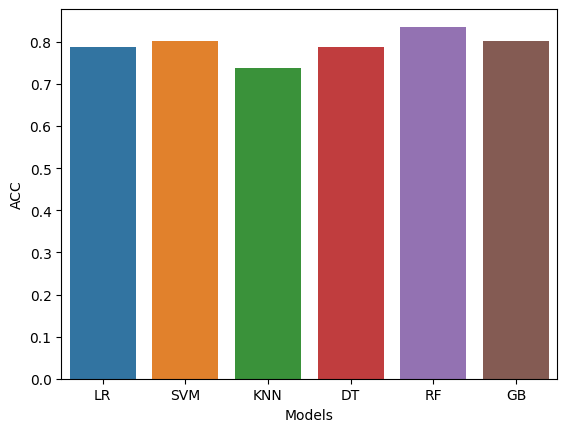

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=final_data['Models'], y=final_data['ACC'])
plt.show()  # This is used to display the plot


In [ ]:
x=data.drop('target',axis=1)
y=data['target']

In [ ]:
x.shape

(302, 13)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

Prediction on new data

In [ ]:
import pandas as pd

In [ ]:
new_data = pd.DataFrame({
    'age': 52,
    'sex': 1,
    'cp': 0,
    'trestbps': 125,
    'chol': 212,
    'fbs': 0,
    'restecg': 1,
    'thalach': 168,
    'exang': 0,
    'oldpeak': 1.0,
    'slope': 2,
    'ca': 2,
    'thal': 3,
}, index=[0])


In [ ]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [ ]:
p=rf.predict(new_data)

In [ ]:
p

array([0])

In [ ]:
if p[0]==0:
  print("NO DISEASE")
else:
    print("DISEASE")

NO DISEASE
